In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [ ]:
v = CountVectorizer(ngram_range=(1,1))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [ ]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [ ]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [ ]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
preprocess("Thor ate pizza")


'thor eat pizza'

In [ ]:
preprocess("Loki is eating pizza")


'Loki eat pizza'

In [ ]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [ ]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

#### Now generate bag of n gram vector for few sample documents



In [ ]:
v.transform(["Thor eat pizza"]).toarray()


array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [ ]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

###### News Category Classification Problem


1-BUSINESS

2-SPORTS

3-CRIME

4-SCIENCE

In [ ]:
import pandas as pd

df = pd.read_json('/content/News_Category_Dataset.json', lines=True)[['headline', 'category']]

print(df.shape)

df.head()

(124989, 2)


,headline,category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT


In [ ]:
df.category.value_counts()

,count
category,
POLITICS,32739
ENTERTAINMENT,14257
HEALTHY LIVING,6694
QUEER VOICES,4995
BUSINESS,4254
SPORTS,4167
COMEDY,3971
PARENTS,3955
BLACK VOICES,3858


In [ ]:

desired_categories = ['CRIME', 'COMEDY', 'EDUCATION', 'SPORTS']
df_new = df[df['category'].isin(desired_categories)]
df_new.head()

,headline,category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
32,Rachel Dolezal Faces Felony Charges For Welfar...,CRIME
37,Trump's New 'MAGA'-Themed Swimwear Sinks On Tw...,COMEDY
38,Seth Meyers Has 1 Funny Regret After Trump Can...,COMEDY
39,Colbert Wants To Turn NYC Subway Rides Into A ...,COMEDY


In [ ]:
print(df_new.headline.shape)
print(df_new.category.shape)

(12035,)
(12035,)


In [ ]:
df_new.category.value_counts()


,count
category,
SPORTS,4167
COMEDY,3971
CRIME,2893
EDUCATION,1004


In [ ]:
min_samples = df_new.category.value_counts().min()


df_business = df_new[df_new.category=="COMEDY"].sample(min_samples, random_state=2022)
df_sports = df_new[df_new.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df_new[df_new.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df_new[df_new.category=="EDUCATION"].sample(min_samples, random_state=2022)

In [ ]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

,count
category,
COMEDY,1004
SPORTS,1004
CRIME,1004
EDUCATION,1004


In [ ]:
#target = {'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'COMEDY': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'EDUCATION': 3
})

In [ ]:
df_balanced.tail()


,headline,category,category_num
103016,Teaching the Bible as Literature in Public Hig...,EDUCATION,3
98460,"Parents, Share Your Story: How Do You Empower ...",EDUCATION,3
24855,California Law Spurs Reforms After High School...,EDUCATION,3
30053,The Alt-Right Curriculum,EDUCATION,3
117883,"In Order for Our Kids to Keep Learning, We Nee...",EDUCATION,3


#### Build a model with original text (no pre processing)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.headline,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [ ]:
print(X_train.shape)
X_train.head()

(3212,)


,headline
55849,Everyone Is Wondering If Steph Curry Will Be S...
120726,Chrome Co-Owner Slams Belmont Winner: 'This Is...
21364,Partisan Divide About College Reflects Our Dis...
1996,3rd-Grader Gives Donald Trump A Lesson In Fake...
56354,Russell Westbrook Withdraws From Olympics In B...


In [ ]:
y_train.value_counts()


,count
category_num,
1,803
3,803
0,803
2,803


In [ ]:
y_test.value_counts()


,count
category_num,
1,201
0,201
3,201
2,201


##### Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))), #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       201
           1       0.77      0.74      0.76       201
           2       0.92      0.87      0.90       201
           3       0.77      0.86      0.81       201

    accuracy                           0.81       804
   macro avg       0.81      0.81      0.81       804
weighted avg       0.81      0.81      0.81       804



In [ ]:
X_test[:8]
#target = {'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}


,headline
83892,Abby Wambach Urges Corporate Sponsors To Inves...
2032,Time Traveler Jimmy Kimmel Warns Baby Donald T...
33368,"Muhammad Ali's Son Detained At Airport, Asked ..."
119391,Juliana Hatfield Giving Zero F*cks Is Our Stol...
17018,'Waiting For Evidence' Before Granting Charter...
78905,Kobe Bryant Teaches D'Angelo Russell The Secre...
2370,Judge Denies Bill Cosby's Request For A Mistri...
56335,SEC Sweeps NCAA Track & Field Titles


In [ ]:
y_pred[:8]


array([1, 0, 2, 3, 3, 1, 2, 1])

#### Attempt 2 : Use 1-gram and bigrams



In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       201
           1       0.78      0.75      0.76       201
           2       0.94      0.87      0.90       201
           3       0.78      0.87      0.82       201

    accuracy                           0.82       804
   macro avg       0.82      0.82      0.82       804
weighted avg       0.82      0.82      0.82       804



#### Attempt 3 : Use 1-gram to trigrams



In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       201
           1       0.77      0.75      0.76       201
           2       0.94      0.87      0.90       201
           3       0.79      0.87      0.83       201

    accuracy                           0.82       804
   macro avg       0.82      0.82      0.82       804
weighted avg       0.82      0.82      0.82       804



### Use text pre-processing to remove stop words, punctuations and apply lemmatization


In [ ]:
df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess)


In [ ]:
df_balanced.head()


,headline,category,category_num,preprocessed_txt
64294,Hug Factory,COMEDY,0,Hug Factory
65708,A Donald Trump Ad From His Largest Constituenc...,COMEDY,0,Donald Trump Ad large Constituency poorly educate
28022,Patton Oswalt: Donald Trump Is America's 'Raci...,COMEDY,0,Patton Oswalt Donald Trump America Racist Pala...
109855,These Cartoon Voice Actors REALLY Get Into The...,COMEDY,0,Cartoon Voice Actors Fight Scenes
35470,'Real People' In Car Commercials Are Either Ac...,COMEDY,0,real People Car commercial Actors terribly bright


##### Build a model with pre processed text



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [ ]:
print(X_train.shape)
X_train.head()

(3212,)


,preprocessed_txt
55849,wonder Steph Curry suspend Game 7
120726,Chrome Co Owner Slams Belmont Winner Cowards way
21364,Partisan Divide College reflect dislike
1996,3rd Grader give Donald Trump Lesson Fake News ...
56354,Russell Westbrook Withdraws Olympics Brazil


In [ ]:
y_train.value_counts()


,count
category_num,
1,803
3,803
0,803
2,803


In [ ]:
y_test.value_counts()


,count
category_num,
1,201
0,201
3,201
2,201


In [ ]:

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       201
           1       0.82      0.79      0.80       201
           2       0.88      0.91      0.89       201
           3       0.84      0.82      0.83       201

    accuracy                           0.83       804
   macro avg       0.83      0.83      0.83       804
weighted avg       0.83      0.83      0.83       804



#### Plot confusion matrix



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[164,  18,   5,  14],
       [ 18, 158,  14,  11],
       [  6,   5, 183,   7],
       [ 18,  11,   7, 165]])

Text(95.72222222222221, 0.5, 'Truth')

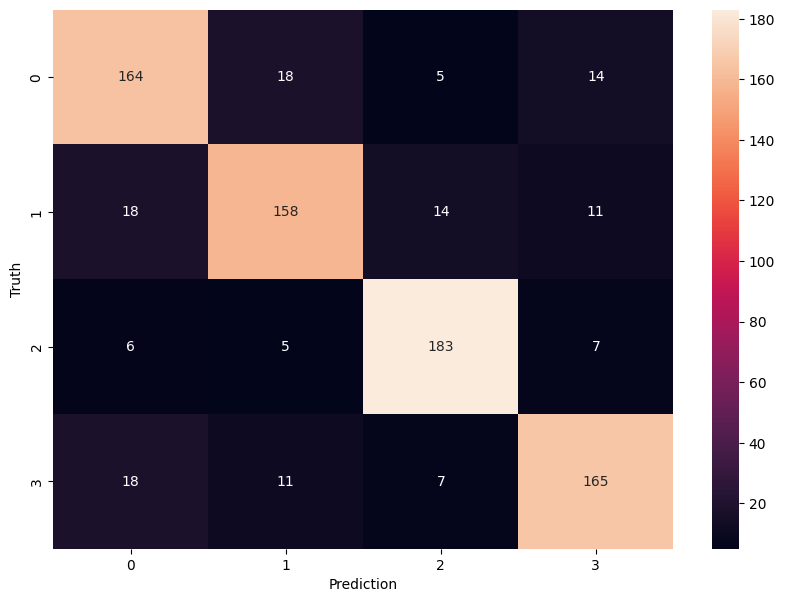

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')